In [1]:
import pandas as pd
sort_data = pd.read_csv('./statisticsk5.txt')
radix_base_10_data = pd.read_csv('./radix_base_10.txt')
radix_base_100_data = pd.read_csv('./radix_base_100.txt')
radix_base_log_data = pd.read_csv('./radix_base_log.txt')
sort_data = pd.concat([sort_data, radix_base_log_data, radix_base_10_data, radix_base_100_data])
sort_data.info()
sort_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 0 to 1999
Data columns (total 5 columns):
type             8500 non-null object
length_of_arr    8500 non-null int64
no_compares      8500 non-null int64
no_swaps         8500 non-null int64
time             8500 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 398.4+ KB


,type,length_of_arr,no_compares,no_swaps,time
1990,radix_base_100,10000,50000,0,0.050409
1991,radix_base_100,10000,50000,0,0.049045
1992,radix_base_100,10000,50000,0,0.057002
1993,radix_base_100,10000,50000,0,0.052710
1994,radix_base_100,10000,50000,0,0.052997
1995,radix_base_100,10000,50000,0,0.059842
1996,radix_base_100,10000,50000,0,0.051335
1997,radix_base_100,10000,50000,0,0.053281
1998,radix_base_100,10000,50000,0,0.054392
1999,radix_base_100,10000,50000,0,0.053572


In [2]:
sort_data_type = []
markers = {'*': 'insert', 
           '^': 'quick', 
           'o': 'merge', 
           'd': 'dual_quick',
           'p': 'hybrid', 
           '|': 'radix_base_log', 
           'X': 'radix_base_10',
           '8': 'radix_base_100'}
for key, value in markers.items():
    sort_data_type.append(sort_data[sort_data['type'] == value].groupby('length_of_arr').mean())
sort_data_type[1].head()

,no_compares,no_swaps,time
length_of_arr,,,
100,408.4,687.0,0.000850
200,817.0,1459.4,0.001664
300,1459.6,2435.4,0.003887
400,2128.8,3536.8,0.003706
500,2956.6,4970.0,0.006803


In [3]:
for sortation in sort_data_type:
    sortation['compares_to_n'] = sortation['no_compares'] / sortation.index.values
    sortation['swaps_to_n'] = sortation['no_swaps'] / sortation.index.values
sort_data_type[0].head()

,no_compares,no_swaps,time,compares_to_n,swaps_to_n
length_of_arr,,,,,
100,2591.2,2588.4,0.003320,25.912000,25.8840
200,9900.4,9895.6,0.015092,49.502000,49.4780
300,23496.8,23491.2,0.033006,78.322667,78.3040
400,40364.0,40358.6,0.055100,100.910000,100.8965
500,62728.6,62721.8,0.083743,125.457200,125.4436


In [4]:
for sortation in sort_data_type:
    print(sortation.describe())

        no_compares      no_swaps        time  compares_to_n   swaps_to_n
count  1.000000e+02  1.000000e+02  100.000000     100.000000   100.000000
mean   8.464745e+06  8.464737e+06    9.967230    1263.527040  1263.523939
std    7.563762e+06  7.563761e+06    8.657171     725.583158   725.585890
min    2.591200e+03  2.588400e+03    0.003320      25.912000    25.884000
25%    1.655146e+06  1.655138e+06    2.099061     642.540133   642.537183
50%    6.388447e+06  6.388439e+06    7.974109    1264.903693  1264.902108
75%    1.418901e+07  1.418900e+07   16.320055    1885.546286  1885.545203
max    2.503350e+07  2.503349e+07   28.889951    2503.349620  2503.348560
        no_compares       no_swaps        time  compares_to_n  swaps_to_n
count    100.000000     100.000000  100.000000     100.000000  100.000000
mean   40275.758000   73956.450000    0.074181       7.485503   13.672488
std    25294.566247   46696.364306    0.043780       0.989321    1.915411
min      408.400000     687.000000    

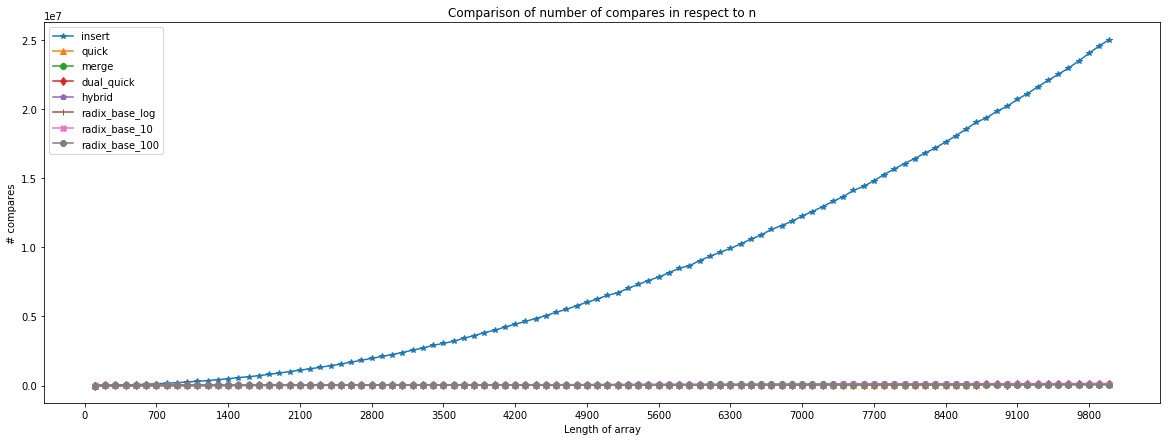

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 7))
for sortation, marker_sign in zip(sort_data_type, markers.items()):
    plt.plot(sortation.index.values, sortation['no_compares'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("# compares")
plt.legend()
plt.title("Comparison of number of compares in respect to n")
plt.show()

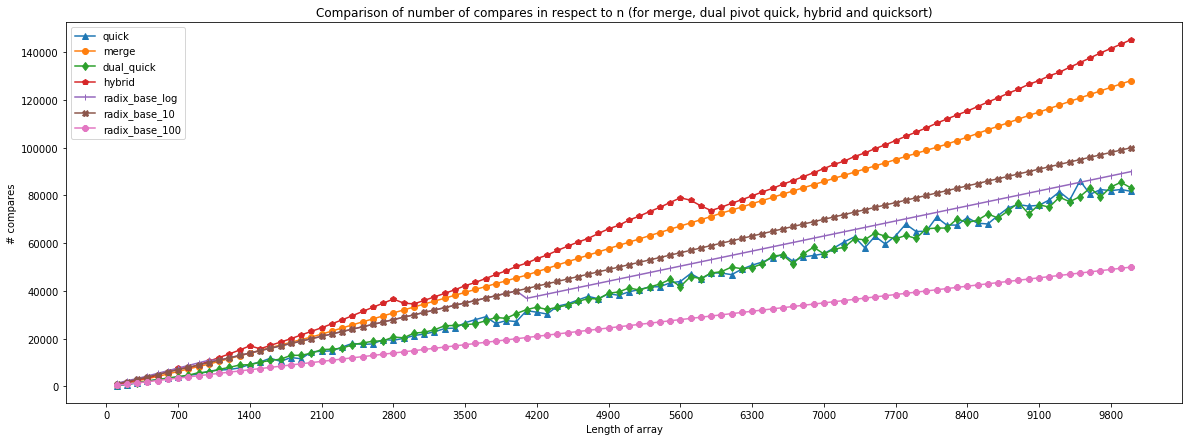

In [6]:
fig = plt.figure(figsize=(20, 7))
for i, marker_sign in zip(range(1, 8), list(markers.items())[1:8]):
    plt.plot(sort_data_type[i].index.values, sort_data_type[i]['no_compares'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("# compares")
plt.legend()
plt.title("Comparison of number of compares in respect to n (for merge, dual pivot quick, hybrid and quicksort)")
plt.show()

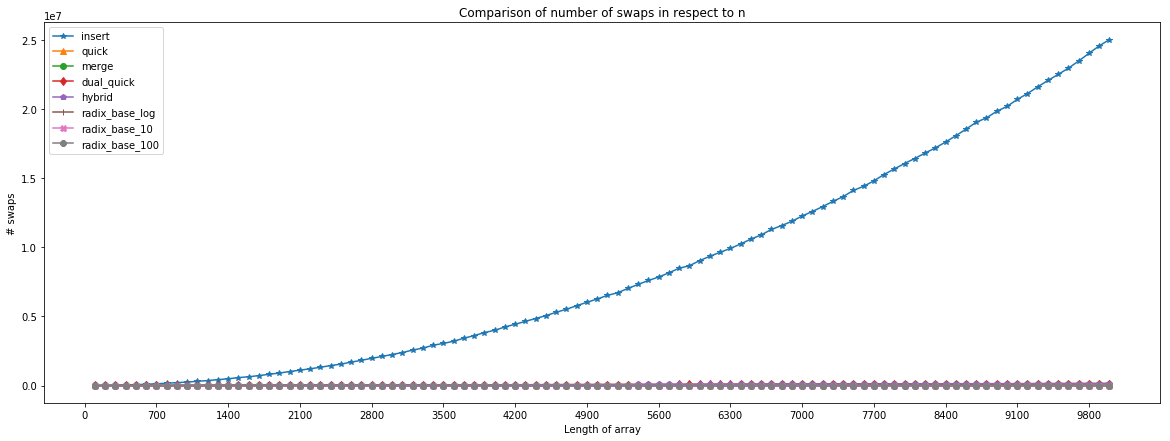

In [7]:
fig = plt.figure(figsize=(20, 7))
for sortation, marker_sign in zip(sort_data_type, markers.items()):
    plt.plot(sortation.index.values, sortation['no_swaps'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("# swaps")
plt.legend()
plt.title("Comparison of number of swaps in respect to n")
plt.show()

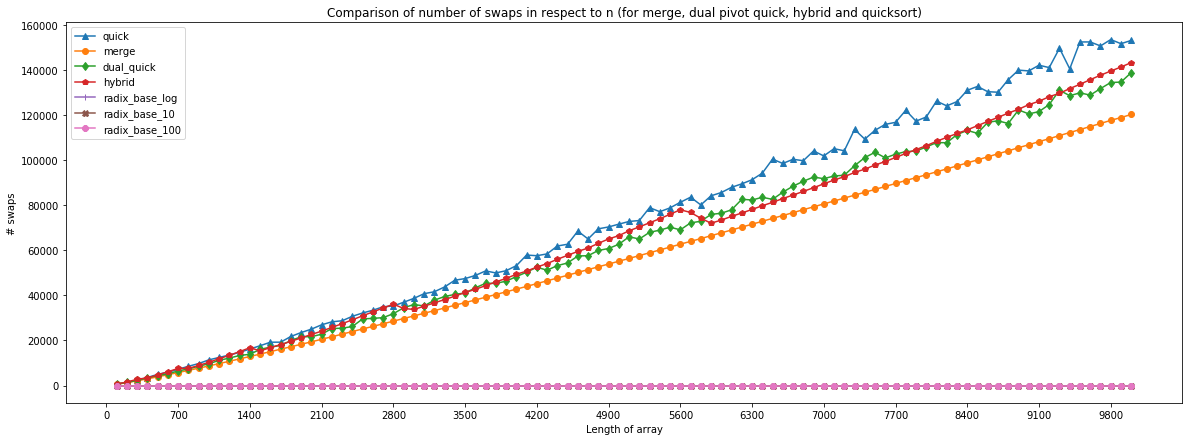

In [8]:
fig = plt.figure(figsize=(20, 7))
for i, marker_sign in zip(range(1, 8), list(markers.items())[1:8]):
    plt.plot(sort_data_type[i].index.values, sort_data_type[i]['no_swaps'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("# swaps")
plt.legend()
plt.title("Comparison of number of swaps in respect to n (for merge, dual pivot quick, hybrid and quicksort)")
plt.show()

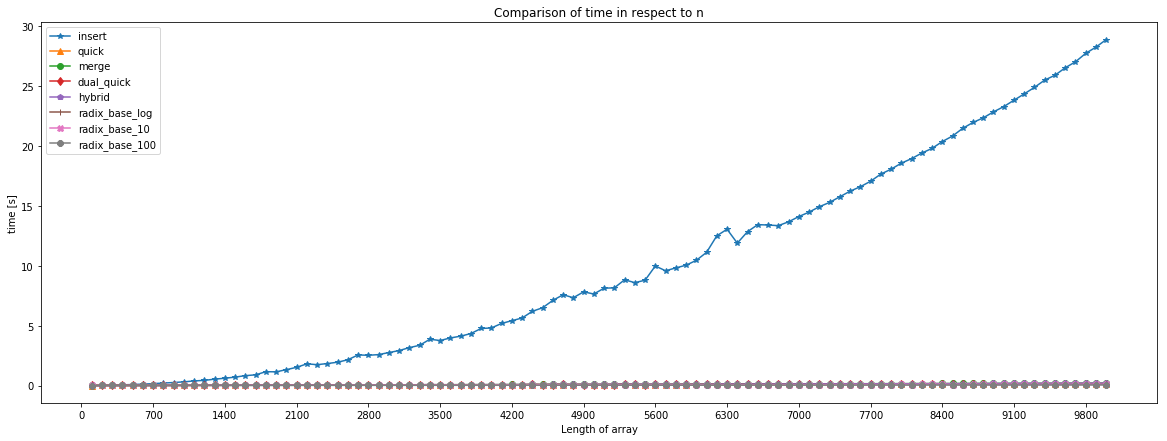

In [9]:
fig = plt.figure(figsize=(20, 7))
for sortation, marker_sign in zip(sort_data_type, markers.items()):
    plt.plot(sortation.index.values, sortation['time'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("time [s]")
plt.legend()
plt.title("Comparison of time in respect to n")
plt.show()

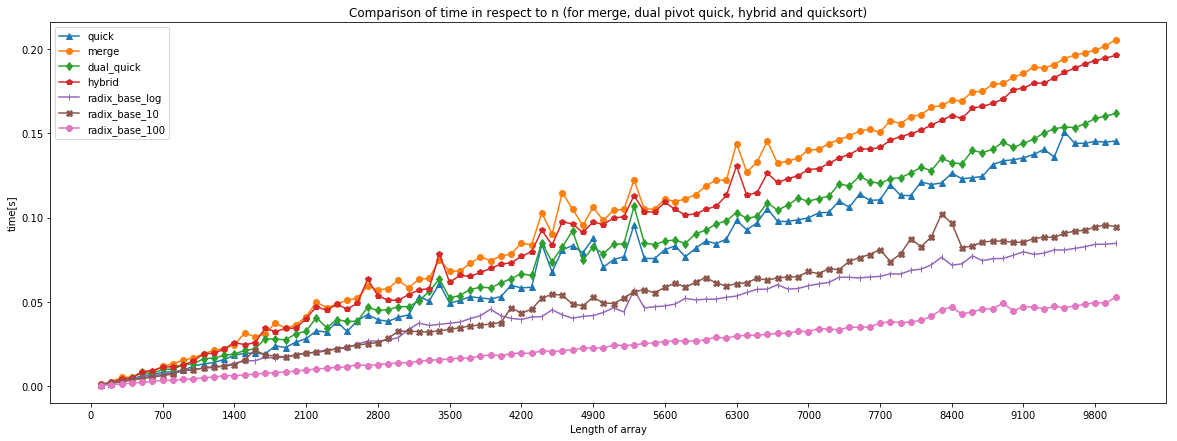

In [10]:
fig = plt.figure(figsize=(20, 7))
for i, marker_sign in zip(range(1, 8), list(markers.items())[1:8]):
    plt.plot(sort_data_type[i].index.values, sort_data_type[i]['time'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("time[s]")
plt.legend()
plt.title("Comparison of time in respect to n (for merge, dual pivot quick, hybrid and quicksort)")
plt.show()

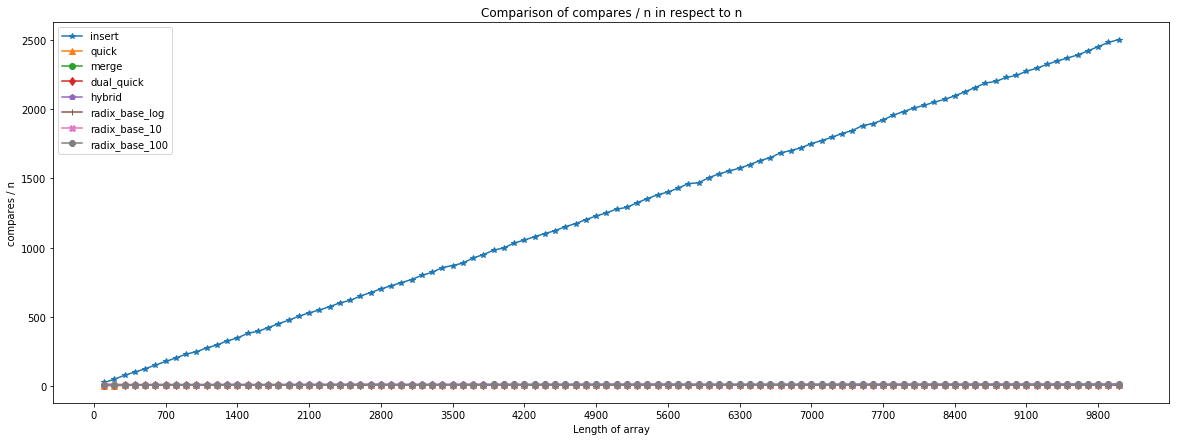

In [11]:
fig = plt.figure(figsize=(20, 7))
for sortation, marker_sign in zip(sort_data_type, markers.items()):
    plt.plot(sortation.index.values, sortation['compares_to_n'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("compares / n")
plt.legend()
plt.title("Comparison of compares / n in respect to n")
plt.show()

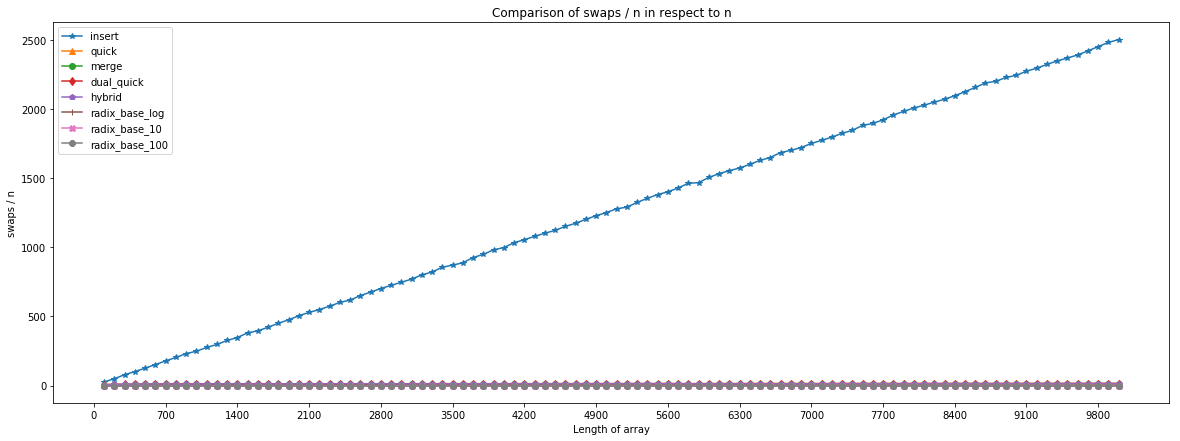

In [12]:
fig = plt.figure(figsize=(20, 7))
for sortation, marker_sign in zip(sort_data_type, markers.items()):
    plt.plot(sortation.index.values, sortation['swaps_to_n'], ls='-', marker=marker_sign[0], label=marker_sign[1])
plt.xlabel("Length of array")
plt.xticks(range(0, 10001, 700))
plt.ylabel("swaps / n")
plt.legend()
plt.title("Comparison of swaps / n in respect to n")
plt.show()

In [13]:
import numpy as np
quick_data = pd.read_csv('./dualquickk50.txt')
quick_data = quick_data.groupby('length_of_arr').mean()
sum(quick_data['no_compares'] / (quick_data.index.values * np.log(quick_data.index.values))) / len(quick_data['no_compares'])

1.7309099510556083

In [14]:
from sorting_class import Sorting
import time
import random
from operator import __ge__
def prepare_list(length):
    array = []
    for i in range(100):
        for j in range(length):
            array.append([random.randint(0, 1000) for _ in range(i)])
    return array
sorts = [Sorting.quick_sort, Sorting.insert_sort, Sorting.merge_sort]
columns = ['length_of_arr', 'time_quick', 'time_insert', 'time_merge']
temp_data = pd.DataFrame(columns=columns)
temp_data[columns[0]] = [i  for i in range(100) for j in range (100)]
for i in range(3):
    temp_array = prepare_list(100)
    temp = []
    for j in range(len(temp_array)):
        start_time = time.time()
        sorts[i](Sorting.get_instance(), temp_array[j], __ge__, 0, len(temp_array[j]) - 1)
        finish_time = time.time() - start_time
        temp.append(finish_time)
    temp_data[columns[i + 1]] = temp  

In [15]:
temp_data = temp_data.groupby(['length_of_arr']).mean()
temp_data.head()

,time_quick,time_insert,time_merge
length_of_arr,,,
0,0.000001,0.000002,0.000001
1,0.000001,0.000002,0.000001
2,0.000008,0.000003,0.000005
3,0.000013,0.000005,0.000010
4,0.000018,0.000008,0.000014


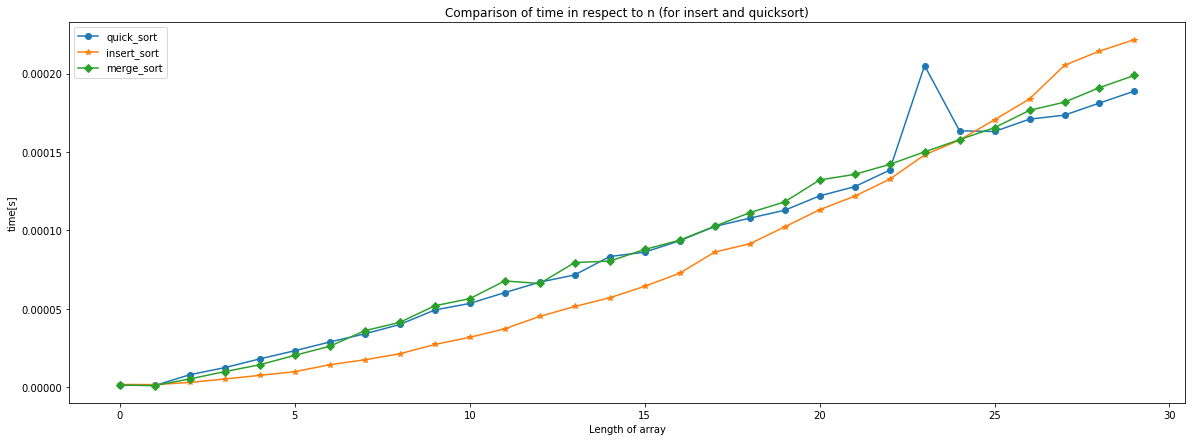

In [16]:
fig = plt.figure(figsize=(20, 7))
plt.plot(temp_data.index.values[:30], temp_data['time_quick'][:30], ls='-', marker='o', label='quick_sort')
plt.plot(temp_data.index.values[:30], temp_data['time_insert'][:30], ls='-', marker='*', label='insert_sort')
plt.plot(temp_data.index.values[:30], temp_data['time_merge'][:30], ls='-', marker='D', label='merge_sort')
plt.xlabel("Length of array")
plt.ylabel("time[s]")
plt.legend()
plt.title("Comparison of time in respect to n (for insert and quicksort)")
plt.show()

Wniosek do zadania dodatkowego: uzywamy insert sorta w połączeniu z merge sortem od około 22 elementowej tablicy